In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!sudo apt update
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, rc={'text.usetex' : True})
from matplotlib import pyplot as plt

In [59]:
def read_month_from_datetime64(datetime64Val):
    return datetime64Val.astype('datetime64[M]').astype(int) % 12 + 1

def read_raw_data(path_to_csv, missing_limit=0.05):
    """
    This function reads the downloaded raw CSV file and returns a 7 lists of
    numpy arrays where each array has 2 columns (first for time stamp in
    datetime64[s] format and second for the corresponding values of pollutant).
    The 7 lists correspond to the 7 pollutants (i.e., PM2.5, PM10, NO2, NH3,
    SO2, CO, and ground-level O3). Only those month-pollutant combinations will
    be returned where the ratio of missing data and overall data is less than
    the specified missing limit.

    Parameters
    ----------
    path_to_csv : string
        The path to raw CSV file
    missing_limit : float
        The maximum ratio of missing values to complete data in a month for a
        particular pollutant for which the data will be appended in the list.

    Returns
    -------
    pm10 : list
        List of ndarray objects contatining month-wise data for PM10 pollutant
        with a maximum of 100*missing_limit% missing values
    pm25 : list
        List of ndarray objects contatining month-wise data for PM2.5 pollutant
        with a maximum of 100*missing_limit% missing values
    NH3  : list
        List of ndarray objects contatining month-wise data for NH3 pollutant
        with a maximum of 100*missing_limit% missing values
    NO2  : list
        List of ndarray objects contatining month-wise data for NO2 pollutant
        with a maximum of 100*missing_limit% missing values
    CO   : list
        List of ndarray objects contatining month-wise data for CO pollutant
        with a maximum of 100*missing_limit% missing values
    SO2  : list
        List of ndarray objects contatining month-wise data for SO2 pollutant
        with a maximum of 100*missing_limit% missing values
    O3   : list
        List of ndarray objects contatining month-wise data for O3 pollutant
        with a maximum of 100*missing_limit% missing values
    mVal : ndarray
        ndarray with 7 rows corresponding to 7 pollutants and 12 columns
        corresponding to 12 months where values equal to the missing number
        ratio for the pollutant in that month

    """
    #pm10, pm25, NH3, NO2, CO, SO2, O3 = ([], ) * 7
    pm10 = []
    pm25 = []
    NH3 = []
    NO2 = []
    CO = []
    SO2 = []
    O3 = []
    mVal = np.zeros((7,12))
    with open(path_to_csv, 'r') as rawData:
        prev_mnth = 0
        #pm10arr, pm25arr, NH3arr, NO2arr, COarr, SO2arr, O3arr = (np.empty((3,1)),) * 7
        pm10arr = np.empty((3,1))
        pm25arr = np.empty((3,1))
        NH3arr  = np.empty((3,1))
        NO2arr  = np.empty((3,1))
        COarr   = np.empty((3,1))
        SO2arr  = np.empty((3,1))
        O3arr   = np.empty((3,1))

        for line in rawData:
            dataEntry = line.rstrip().split(';')
            #curr_mnth = int(dataEntry[0].split('-')[1])
            startTime = np.array(pd.to_datetime(dataEntry[0], format='%d-%m-%Y %H:%M'), dtype=np.datetime64)
            endTime   = np.array(pd.to_datetime(dataEntry[1], format='%d-%m-%Y %H:%M'), dtype=np.datetime64)
            curr_mnth = read_month_from_datetime64(startTime)
            pm10val   = float(dataEntry[2].replace(",", ".")) if not (dataEntry[2] == 'None' or dataEntry[2] == "" or dataEntry[2] == '0') else np.nan
            pm25val   = float(dataEntry[3].replace(",", ".")) if not (dataEntry[3] == 'None' or dataEntry[3] == "" or dataEntry[3] == '0') else np.nan
            NH3val    = float(dataEntry[4].replace(",", ".")) if not (dataEntry[4] == 'None' or dataEntry[4] == "" or dataEntry[4] == '0') else np.nan
            NO2val    = float(dataEntry[5].replace(",", ".")) if not (dataEntry[5] == 'None' or dataEntry[5] == "" or dataEntry[5] == '0') else np.nan
            COval     = float(dataEntry[6].replace(",", ".")) if not (dataEntry[6] == 'None' or dataEntry[6] == "" or dataEntry[6] == '0') else np.nan
            SO2val    = float(dataEntry[7].replace(",", ".")) if not (dataEntry[7] == 'None' or dataEntry[7] == "" or dataEntry[7] == '0') else np.nan
            O3val     = float(dataEntry[8].replace(",", ".")) if not (dataEntry[8] == 'None' or dataEntry[8] == "" or dataEntry[8] == '0') else np.nan
            #print(startTime, endTime, pm10val, pm25val, NH3val, NO2val, COval, SO2val, O3val)
            #break
            if curr_mnth==prev_mnth:
                pm10arr   = np.append(pm10arr, np.array([[endTime], [curr_mnth], [pm10val]]), axis=1)
                pm25arr   = np.append(pm25arr, np.array([[endTime], [curr_mnth], [pm25val]]), axis=1)
                NH3arr    = np.append(NH3arr, np.array([[endTime], [curr_mnth], [NH3val]]), axis=1)
                NO2arr    = np.append(NO2arr, np.array([[endTime], [curr_mnth], [NO2val]]), axis=1)
                COarr     = np.append(COarr, np.array([[endTime], [curr_mnth], [COval]]), axis=1)
                SO2arr    = np.append(SO2arr, np.array([[endTime], [curr_mnth], [SO2val]]), axis=1)
                O3arr     = np.append(O3arr, np.array([[endTime], [curr_mnth], [O3val]]), axis=1)
            elif curr_mnth==prev_mnth+1:
                if not prev_mnth==0:
                    #print('Missing Values Ratio For Month = ', prev_mnth)
                    # If ratio of missing values is under missing_limit, then append the data to the corresponding list
                    mVal[0, prev_mnth-1] = np.count_nonzero(np.isnan(pm10arr[2,:].astype('float64')))/(np.shape(pm10arr)[1])
                    #print(mVal[0, prev_mnth-1])
                    if mVal[0, prev_mnth-1] <= missing_limit:
                        pm10.append(pm10arr)
                    mVal[1, prev_mnth-1] = np.count_nonzero(np.isnan(pm25arr[2,:].astype('float64')))/(np.shape(pm25arr)[1])
                    #print(mVal[1, prev_mnth-1])
                    if mVal[1, prev_mnth-1] <= missing_limit:
                        pm25.append(pm25arr)
                    mVal[2, prev_mnth-1] = np.count_nonzero(np.isnan(NH3arr[2,:].astype('float64')))/(np.shape(NH3arr)[1])
                    #print(mVal[2, prev_mnth-1])
                    if mVal[2, prev_mnth-1] <= missing_limit:
                        NH3.append(NH3arr)
                    mVal[3, prev_mnth-1] = np.count_nonzero(np.isnan(NO2arr[2,:].astype('float64')))/(np.shape(NO2arr)[1])
                    #print(mVal[3, prev_mnth-1])
                    if mVal[3, prev_mnth-1] <= missing_limit:
                        NO2.append(NO2arr)
                    mVal[4, prev_mnth-1] = np.count_nonzero(np.isnan(COarr[2,:].astype('float64')))/(np.shape(COarr)[1])
                    #print(mVal[4, prev_mnth-1])
                    if mVal[4, prev_mnth-1] <= missing_limit:
                        CO.append(COarr)
                    mVal[5, prev_mnth-1] = np.count_nonzero(np.isnan(SO2arr[2,:].astype('float64')))/(np.shape(SO2arr)[1])
                    #print(mVal[5, prev_mnth-1])
                    if mVal[5, prev_mnth-1] <= missing_limit:
                        SO2.append(SO2arr)
                    mVal[6, prev_mnth-1] = np.count_nonzero(np.isnan(O3arr[2,:].astype('float64')))/(np.shape(O3arr)[1])
                    #print(mVal[6, prev_mnth-1])
                    if mVal[6, prev_mnth-1] <= missing_limit:
                        O3.append(O3arr)
                    #print(prev_mnth, len(pm10), len(pm25), len(NH3), len(NO2), len(CO), len(SO2), len(O3))
                prev_mnth = curr_mnth
                # Restart the arrays
                pm10arr, pm25arr, NH3arr, NO2arr, COarr, SO2arr, O3arr = (np.empty((3,1)),) * 7
                pm10arr   = np.append(pm10arr, np.array([[endTime], [curr_mnth], [pm10val]]), axis=1)[:,1].reshape((3,1))
                pm25arr   = np.append(pm25arr, np.array([[endTime], [curr_mnth], [pm25val]]), axis=1)[:,1].reshape((3,1))
                NH3arr    = np.append(NH3arr, np.array([[endTime], [curr_mnth], [NH3val]]), axis=1)[:,1].reshape((3,1))
                NO2arr    = np.append(NO2arr, np.array([[endTime], [curr_mnth], [NO2val]]), axis=1)[:,1].reshape((3,1))
                COarr     = np.append(COarr, np.array([[endTime], [curr_mnth], [COval]]), axis=1)[:,1].reshape((3,1))
                SO2arr    = np.append(SO2arr, np.array([[endTime], [curr_mnth], [SO2val]]), axis=1)[:,1].reshape((3,1))
                O3arr     = np.append(O3arr, np.array([[endTime], [curr_mnth], [O3val]]), axis=1)[:,1].reshape((3,1))
            else:
                if prev_mnth==0:
                    print('First month which is encountered is', curr_mnth)
                else:
                    print('Encountered month', curr_mnth, 'immediately after month', prev_mnth)
                raise('Error: Inconsistency at month level in CSV data!')
        # For the final month: If ratio of missing values is under missing_limit, then append the data to the corresponding list
        #print('Missing Values Ratio For Month = ', prev_mnth)
        # If ratio of missing values is under missing_limit, then append the data to the corresponding list
        mVal[0, prev_mnth-1] = np.count_nonzero(np.isnan(pm10arr[2,:].astype('float64')))/(np.shape(pm10arr)[1])
        #print(mVal[0, prev_mnth-1])
        if mVal[0, prev_mnth-1] <= missing_limit:
            pm10.append(pm10arr)
        mVal[1, prev_mnth-1] = np.count_nonzero(np.isnan(pm25arr[2,:].astype('float64')))/(np.shape(pm25arr)[1])
        #print(mVal[1, prev_mnth-1])
        if mVal[1, prev_mnth-1] <= missing_limit:
            pm25.append(pm25arr)
        mVal[2, prev_mnth-1] = np.count_nonzero(np.isnan(NH3arr[2,:].astype('float64')))/(np.shape(NH3arr)[1])
        #print(mVal[2, prev_mnth-1])
        if mVal[2, prev_mnth-1] <= missing_limit:
            NH3.append(NH3arr)
        mVal[3, prev_mnth-1] = np.count_nonzero(np.isnan(NO2arr[2,:].astype('float64')))/(np.shape(NO2arr)[1])
        #print(mVal[3, prev_mnth-1])
        if mVal[3, prev_mnth-1] <= missing_limit:
            NO2.append(NO2arr)
        mVal[4, prev_mnth-1] = np.count_nonzero(np.isnan(COarr[2,:].astype('float64')))/(np.shape(COarr)[1])
        #print(mVal[4, prev_mnth-1])
        if mVal[4, prev_mnth-1] <= missing_limit:
            CO.append(COarr)
        mVal[5, prev_mnth-1] = np.count_nonzero(np.isnan(SO2arr[2,:].astype('float64')))/(np.shape(SO2arr)[1])
        #print(mVal[5, prev_mnth-1])
        if mVal[5, prev_mnth-1] <= missing_limit:
            SO2.append(SO2arr)
        mVal[6, prev_mnth-1] = np.count_nonzero(np.isnan(O3arr[2,:].astype('float64')))/(np.shape(O3arr)[1])
        #print(mVal[6, prev_mnth-1])
        if mVal[6, prev_mnth-1] <= missing_limit:
            O3.append(O3arr)
        #print(len(pm10), len(pm25), len(NH3), len(NO2), len(CO), len(SO2), len(O3))
    return pm10, pm25, NH3, NO2, CO, SO2, O3, mVal

In [60]:
print('\n******************************************************************\n')
print('Reading Data of Anand Vihar from 2017')
print('\n******************************************************************\n')
AV17_pm10, AV17_pm25, AV17_NH3, AV17_NO2, AV17_CO, AV17_SO2, AV17_O3, AV17_mVal = read_raw_data('/content/drive/My Drive//Colab Notebooks/Pollutant Analysis - Delhi/data/anand_vihar_2017.csv')
print('Final Lengths of all Lists:')
print(len(AV17_pm10), len(AV17_pm25), len(AV17_NH3), len(AV17_NO2), len(AV17_CO), len(AV17_SO2), len(AV17_O3))


******************************************************************

Reading Data of Anand Vihar from 2017

******************************************************************

Final Lengths of all Lists:
0 0 0 0 0 0 0


In [61]:
print('\n******************************************************************\n')
print('Reading Data of Anand Vihar from 2018')
print('\n******************************************************************\n')
AV18_pm10, AV18_pm25, AV18_NH3, AV18_NO2, AV18_CO, AV18_SO2, AV18_O3, AV18_mVal = read_raw_data('/content/drive/My Drive/Colab Notebooks/Pollutant Analysis - Delhi/data/anand_vihar_2018.csv')
print('Final Lengths of all Lists:')
print(len(AV18_pm10), len(AV18_pm25), len(AV18_NH3), len(AV18_NO2), len(AV18_CO), len(AV18_SO2), len(AV18_O3))


******************************************************************

Reading Data of Anand Vihar from 2018

******************************************************************

Final Lengths of all Lists:
2 4 2 0 2 2 1


In [62]:
print('\n******************************************************************\n')
print('Reading Data of Punjabi Bagh from 2017')
print('\n******************************************************************\n')
PB17_pm10, PB17_pm25, PB17_NH3, PB17_NO2, PB17_CO, PB17_SO2, PB17_O3, PB17_mVal = read_raw_data('/content/drive/My Drive/Colab Notebooks/Pollutant Analysis - Delhi/data/punjabi_bagh_2017.csv')
print('Final Lengths of all Lists:')
print(len(PB17_pm10), len(PB17_pm25), len(PB17_NH3), len(PB17_NO2), len(PB17_CO), len(PB17_SO2), len(PB17_O3))


******************************************************************

Reading Data of Punjabi Bagh from 2017

******************************************************************

Final Lengths of all Lists:
1 1 0 1 1 1 0


In [63]:
print('\n******************************************************************\n')
print('Reading Data of Punjabi Bagh from 2018')
print('\n******************************************************************\n')
PB18_pm10, PB18_pm25, PB18_NH3, PB18_NO2, PB18_CO, PB18_SO2, PB18_O3, PB18_mVal = read_raw_data('/content/drive/My Drive/Colab Notebooks/Pollutant Analysis - Delhi/data/punjabi_bagh_2018.csv')
print('Final Lengths of all Lists:')
print(len(PB18_pm10), len(PB18_pm25), len(PB18_NH3), len(PB18_NO2), len(PB18_CO), len(PB18_SO2), len(PB18_O3))


******************************************************************

Reading Data of Punjabi Bagh from 2018

******************************************************************

Final Lengths of all Lists:
7 9 8 6 3 4 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


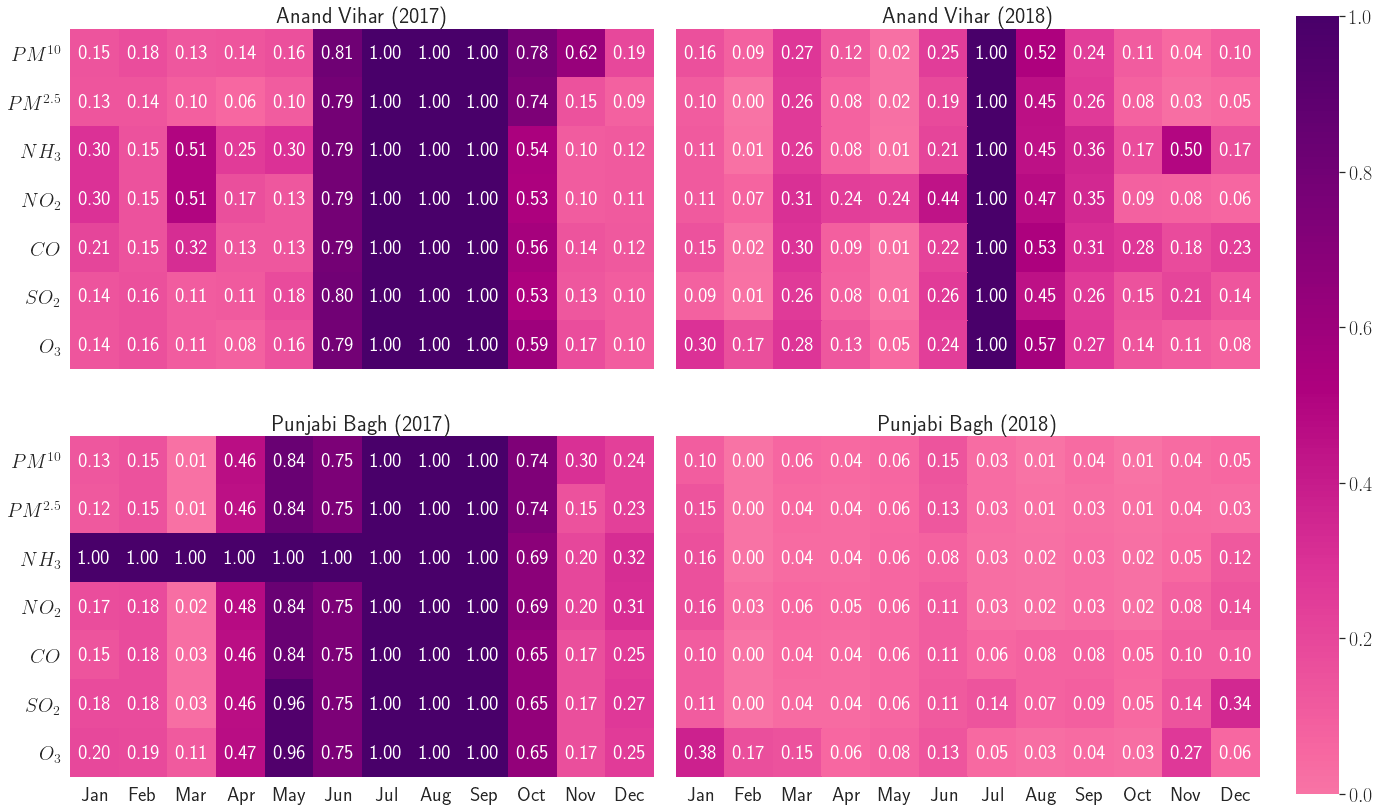

In [64]:
mVals = [AV17_mVal, AV18_mVal, PB17_mVal, PB18_mVal]
hMapTitles = ["Anand Vihar (2017)", "Anand Vihar (2018)", "Punjabi Bagh (2017)", "Punjabi Bagh (2018)"]

plt.rc('font', size=20)         # controls default text sizes
plt.rc('axes', titlesize=22)    # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)   # fontsize of the tick labels
plt.rc('ytick', labelsize=20)   # fontsize of the tick labels
plt.rc('legend', fontsize=20)   # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,12))
cbar_ax = fig.add_axes([.91, 0.05, .03, 0.9])

for i, ax in enumerate(axn.flat):
    sns.heatmap(mVals[i], ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cmap = 'RdPu', center = 0.05, annot=True, fmt='.2f', square=True,
                xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                yticklabels=['$PM^{10}$', '$PM^{2.5}$', '$NH_{3}$', '$NO_{2}$', '$CO$', '$SO_{2}$', '$O_{3}$'],
                cbar_ax=None if i else cbar_ax)
    ax.set_title(hMapTitles[i])

fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("/content/drive/My Drive/Colab Notebooks/Pollutant Analysis - Delhi/Heatmap_MissingValues.pdf", bbox_inches = 'tight', pad_inches = 0.05)

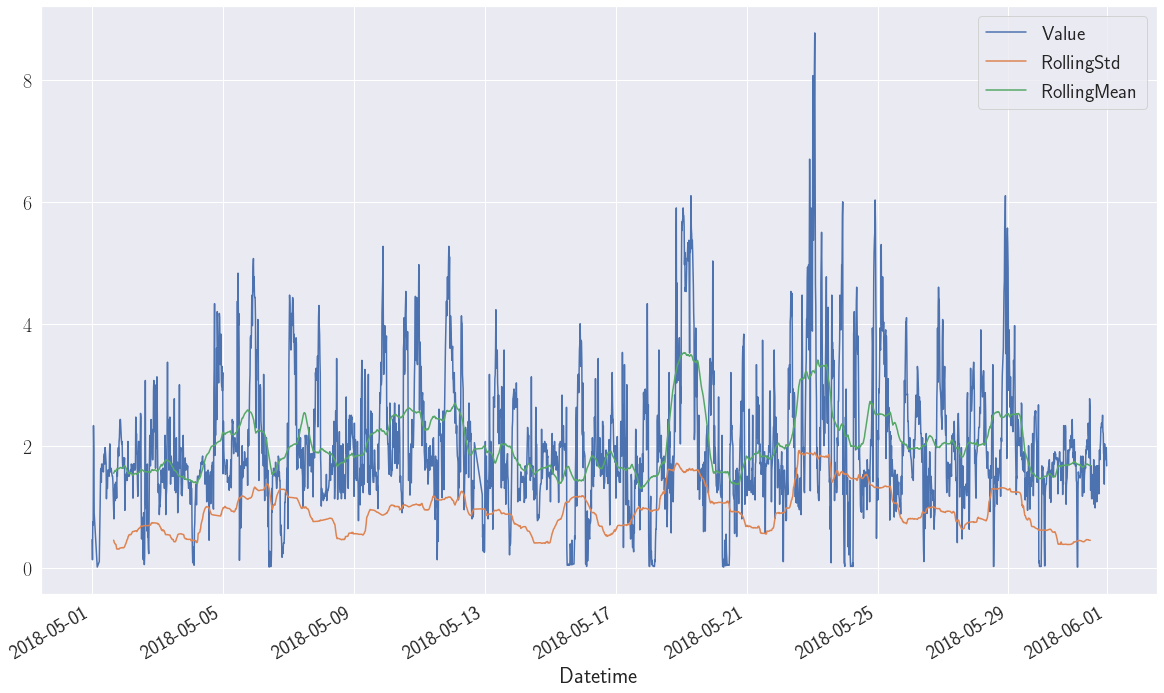

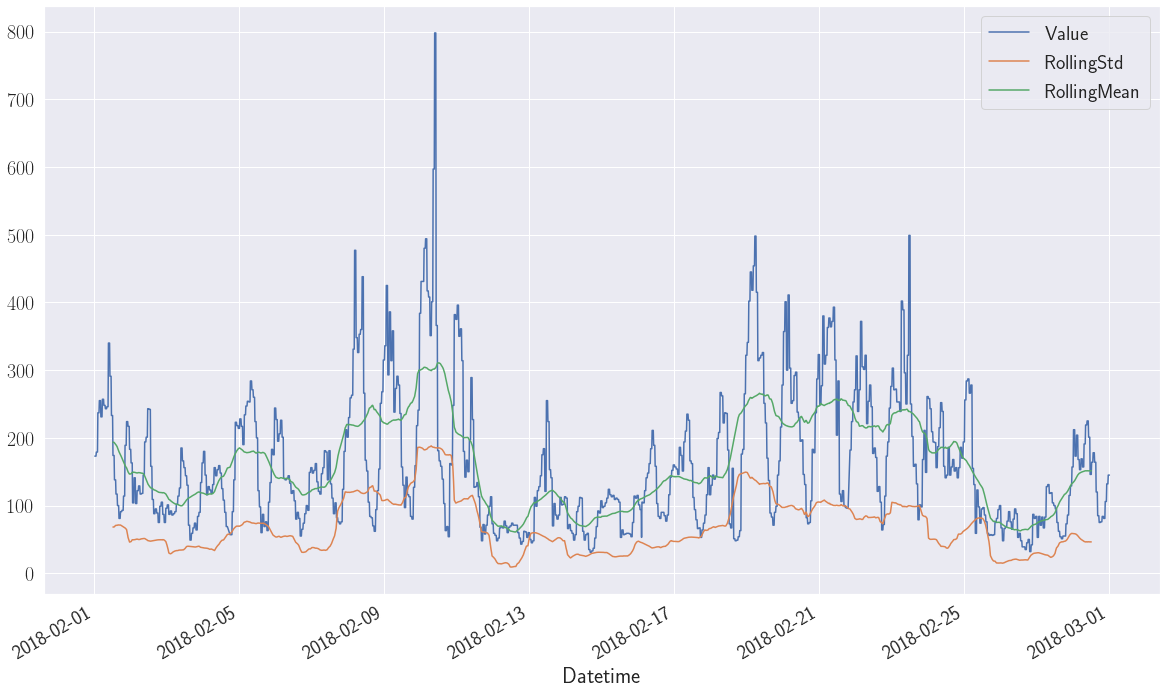

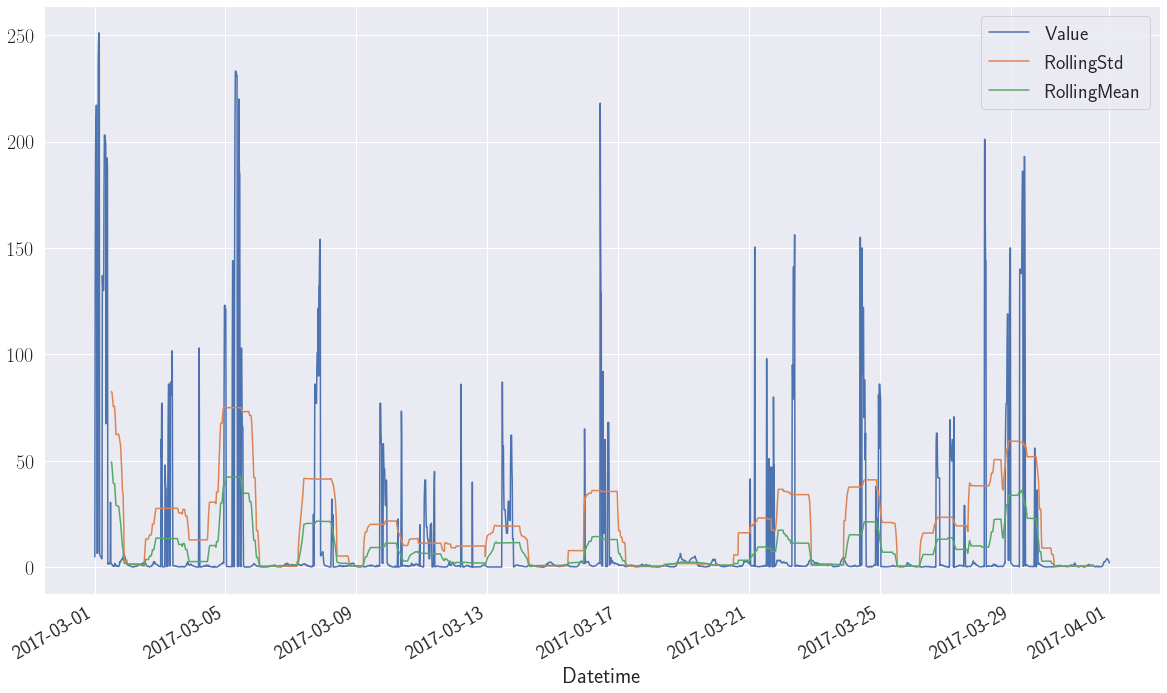

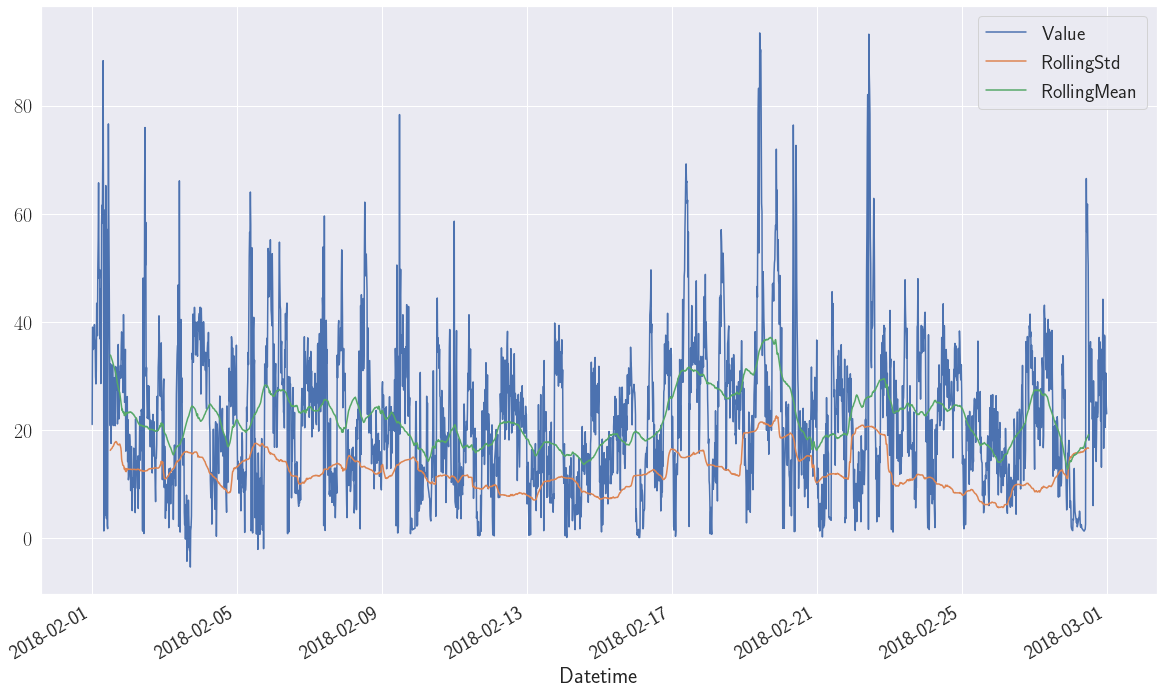

In [120]:
def plot_time_series(npArray, rollingSteps = 5, saveName = None):
    df = pd.DataFrame(npArray, columns = ['Datetime','Month','Value'])
    df['Datetime'] = pd.to_datetime(df['Datetime'].values.astype(np.datetime64))
    df.dropna(inplace=True)
    df['RollingMean'] = df.iloc[:,2].rolling(window = rollingSteps).mean().shift(-int(rollingSteps/2))
    df['RollingStd'] = df.iloc[:,2].rolling(window = rollingSteps).std().shift(-int(rollingSteps/2))
    plt.rc('font', size=20)         # controls default text sizes
    plt.rc('axes', titlesize=22)    # fontsize of the axes title
    plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=20)   # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)   # fontsize of the tick labels
    plt.rc('legend', fontsize=20)   # legend fontsize
    plt.rc('figure', titlesize=25)  # fontsize of the figure title
    ax = df.plot(x="Datetime", y=["Value", "RollingStd", "RollingMean"], figsize=(20, 12))
    if saveName is not None:
        plt.savefig("/content/drive/My Drive/Colab Notebooks/Pollutant Analysis - Delhi/" + saveName + ".pdf", bbox_inches = 'tight', pad_inches = 0.05)

plot_time_series(AV18_CO[1].T, rollingSteps = 97, saveName='AV18_CO_May') # May 2018 - CO - Anand Vihar
plot_time_series(AV18_pm25[0].T, rollingSteps = 97, saveName='AV18_pm25_Feb') # February 2018 - PM2.5 - Anand Vihar
plot_time_series(PB17_pm25[0].T, rollingSteps = 97, saveName='PB17_pm10_Mar') # March 2017 - PM10 - Punjabi Bagh
plot_time_series(PB18_SO2[0].T, rollingSteps = 97, saveName='PB18_SO2_Feb') # February 2018 - SO2 - Punjabi Bagh